# Obesity risk factors classification

In [1]:
# import the nescessary libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import naive_bayes
from sklearn import svm
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [2]:
#importing the dataset
file_path = 'ObesityDataSet_raw_and_data_sinthetic.csv'
data = pd.read_csv(file_path)
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
#checking for the data size and types
print(data.dtypes)
print(data.shape)

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object
(2111, 17)


### Data cleaning and processing

In [4]:
# checking for the null value in dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

since there is no null value we can continue to data processing

In [5]:
# radomizing the order in dataset
data = data.sample(frac=1, random_state=45).reset_index(drop=True)

In [6]:
# seperating data into classes and variables
attributes = data.iloc[:,: -1]
labels = data.iloc[:, -1]
attributes.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,37.631769,1.513202,75.410647,yes,yes,2.0,2.582591,Sometimes,no,1.535134,no,1.884520,0.000000,Sometimes,Automobile
1,Female,25.897815,1.664463,102.781971,yes,yes,3.0,3.000000,Sometimes,no,1.068493,no,0.112122,1.000000,Sometimes,Public_Transportation
2,Female,18.000000,1.620000,68.000000,no,no,2.0,1.000000,Sometimes,no,1.000000,no,0.000000,2.000000,no,Public_Transportation
3,Male,18.014333,1.751029,80.000000,yes,yes,2.0,2.805436,Sometimes,no,2.122884,no,0.045651,0.017225,Frequently,Public_Transportation
4,Male,23.083621,1.848553,121.421121,yes,yes,3.0,2.567567,Sometimes,no,2.011023,no,0.916478,0.000000,Sometimes,Public_Transportation


In [7]:
# since height and weight is a function of body type, we will drop these two variables to focus on the other risk factors
attributes = attributes.drop('Height', axis=1)
attributes = attributes.drop('Weight', axis=1)
attributes.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,37.631769,yes,yes,2.0,2.582591,Sometimes,no,1.535134,no,1.884520,0.000000,Sometimes,Automobile
1,Female,25.897815,yes,yes,3.0,3.000000,Sometimes,no,1.068493,no,0.112122,1.000000,Sometimes,Public_Transportation
2,Female,18.000000,no,no,2.0,1.000000,Sometimes,no,1.000000,no,0.000000,2.000000,no,Public_Transportation
3,Male,18.014333,yes,yes,2.0,2.805436,Sometimes,no,2.122884,no,0.045651,0.017225,Frequently,Public_Transportation
4,Male,23.083621,yes,yes,3.0,2.567567,Sometimes,no,2.011023,no,0.916478,0.000000,Sometimes,Public_Transportation


In [8]:
# encoding variable into binomial and numerical value
var_encoding = {'Gender':                         {'Male': 0, 'Female': 1},
                'family_history_with_overweight': {'yes': 1, 'no': 0},
                'FAVC':                           {'yes': 1, 'no': 0},
                'CAEC':                           {'no': 0, 'Sometimes': 1,
                                                  'Frequently': 2, 'Always': 3},
                'SMOKE':                          {'yes': 1, 'no': 0},
                'SCC':                            {'yes': 1, 'no': 0},
                'CALC':                           {'no': 0, 'Sometimes': 1,
                                                  'Frequently': 2, 'Always': 3}}
attributes = attributes.replace(var_encoding)
attributes.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,1,37.631769,1,1,2.0,2.582591,1,0,1.535134,0,1.884520,0.000000,1,Automobile
1,1,25.897815,1,1,3.0,3.000000,1,0,1.068493,0,0.112122,1.000000,1,Public_Transportation
2,1,18.000000,0,0,2.0,1.000000,1,0,1.000000,0,0.000000,2.000000,0,Public_Transportation
3,0,18.014333,1,1,2.0,2.805436,1,0,2.122884,0,0.045651,0.017225,2,Public_Transportation
4,0,23.083621,1,1,3.0,2.567567,1,0,2.011023,0,0.916478,0.000000,1,Public_Transportation


In [9]:
# for MTRANS, we will use one-hot encoding method since their is no linear relationship between each variables
mtrans = pd.get_dummies(attributes['MTRANS'])
mtrans.head()

,Automobile,Bike,Motorbike,Public_Transportation,Walking
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [10]:
# combining the encoded MTRANS with the rest of the variables
attributes = attributes.drop('MTRANS', axis=1)
attributes = pd.concat([attributes, mtrans], axis=1)
attributes.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking
0,1,37.631769,1,1,2.0,2.582591,1,0,1.535134,0,1.884520,0.000000,1,1,0,0,0,0
1,1,25.897815,1,1,3.0,3.000000,1,0,1.068493,0,0.112122,1.000000,1,0,0,0,1,0
2,1,18.000000,0,0,2.0,1.000000,1,0,1.000000,0,0.000000,2.000000,0,0,0,0,1,0
3,0,18.014333,1,1,2.0,2.805436,1,0,2.122884,0,0.045651,0.017225,2,0,0,0,1,0
4,0,23.083621,1,1,3.0,2.567567,1,0,2.011023,0,0.916478,0.000000,1,0,0,0,1,0


## Classification

In [11]:
# creating a train test split
X_train, X_test, y_train, y_test = train_test_split(attributes, labels, test_size=0.2, random_state=0, stratify=labels)

### Support Vector Machine Classifier

In [12]:
# mapping out the effect of parameters to accuracy
kernels = ['linear', 'rbf', 'poly']
scores = [1, 2, 3, 4, 5]
kernel_cv = pd.DataFrame(index=scores, columns=kernels)
for i in kernels:
    clf = svm.SVC(kernel=i, random_state=45, gamma=0.1)
    clf.fit(X_train, y_train)
    cv = cross_val_score(clf, attributes, labels, cv=5)
    kernel_cv[i] = cv

Text(0.5, 15.0, 'kernels')

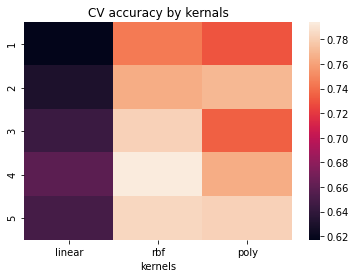

In [13]:
sns.heatmap(kernel_cv)
plt.title('CV accuracy by kernals')
plt.xlabel('kernels')

In [14]:
#creating a classifier
model = svm.SVC(random_state=30)
parameters = [{'kernel': ['linear', 'rbf', 'poly'],
               'C': [0.1, 1, 10],
               'gamma': [0.1, 0.05, 0.1],
               'degree': [2, 3]}]
svm_gridsearch = GridSearchCV(model, parameters, scoring='accuracy')
svm_gridsearch.fit(X_train, y_train)
svm_cla = svm_gridsearch.best_estimator_

In [15]:
#training the model
svm_cla.fit(X_train, y_train)

SVC(C=10, degree=2, gamma=0.1, random_state=30)

In [16]:
# timing the processing time
%timeit svm_cla.fit(X_train, y_train)

85.1 ms ± 1.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [17]:
# testing for in-sample and off-sample accuracy
svm_y_train = svm_cla.predict(X_train)
svm_y_test = svm_cla.predict(X_test)
svm_train_acc = accuracy_score(y_train, svm_y_train)
svm_test_acc = accuracy_score(y_test, svm_y_test)
print('The training accuracy is:', svm_train_acc)
print('The testing sample accuracy is:', svm_test_acc)

The training accuracy is: 0.9520142180094787
The testing sample accuracy is: 0.7966903073286052


In [18]:
# 5-folds crossvalidation
svm_5_folds = cross_val_score(svm_cla, attributes, labels, cv=5)
svm_5_folds_mean = svm_5_folds.mean()
svm_5_folds_var = svm_5_folds.var()
print('the 5-folds crossvalidation accuracy scores are:', svm_5_folds)
print('the 5-folds crossvalidation mean score is:', svm_5_folds_mean)
print('the 5-folds crossvalidation varience is:', svm_5_folds_var)

the 5-folds crossvalidation accuracy scores are: [0.77541371 0.80331754 0.84123223 0.8056872  0.8056872 ]
the 5-folds crossvalidation mean score is: 0.8062675764400076
the 5-folds crossvalidation varience is: 0.00043677284111606963


In [19]:
print(metrics.classification_report(y_test, svm_y_test, digits=3))

                     precision    recall  f1-score   support

Insufficient_Weight      0.821     0.852     0.836        54
      Normal_Weight      0.607     0.586     0.596        58
     Obesity_Type_I      0.747     0.800     0.772        70
    Obesity_Type_II      0.900     0.900     0.900        60
   Obesity_Type_III      1.000     0.969     0.984        65
 Overweight_Level_I      0.746     0.759     0.752        58
Overweight_Level_II      0.741     0.690     0.714        58

           accuracy                          0.797       423
          macro avg      0.795     0.794     0.794       423
       weighted avg      0.797     0.797     0.796       423



Text(90.77375, 0.5, 'predicted label')

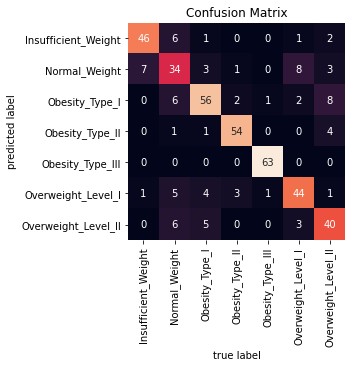

In [20]:
# creating a confusion matrix
svm_matrix = confusion_matrix(y_test,svm_y_test)
sns.heatmap(svm_matrix.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=svm_cla.classes_, yticklabels=svm_cla.classes_)
plt.title('Confusion Matrix')
plt.xlabel('true label')
plt.ylabel('predicted label')